In [11]:
import pyzed.sl as sl
import pandas as pd
import numpy as np

In [12]:
zed = sl.Camera()

In [13]:
# Datei statt Kamera
input_type = sl.InputType()
#input_type.set_from_svo_file('Test/Test.svo')
input_type.set_from_svo_file("C:/Users/Sandra/Documents/ZED/HD1080_SN35071549_13-31-37.svo2")

In [15]:
# Hauptparamter
init_params = sl.InitParameters(input_t=input_type, svo_real_time_mode=False)
init_params.depth_mode = sl.DEPTH_MODE.ULTRA
init_params.coordinate_units = sl.UNIT.METER
init_params.depth_maximum_distance = 50


In [16]:
dir(sl.DEPTH_MODE)

['LAST',
 'NEURAL',
 'NEURAL_PLUS',
 'NONE',
 'PERFORMANCE',
 'QUALITY',
 'ULTRA',
 '__class__',
 '__contains__',
 '__doc__',
 '__getitem__',
 '__init_subclass__',
 '__iter__',
 '__len__',
 '__members__',
 '__module__',
 '__name__',
 '__qualname__']

In [17]:
zed.open(init_params)

SUCCESS

In [18]:
# Detektionsparameter
detection_parameters = sl.ObjectDetectionParameters()
#detection_parameters.image_sync = True
detection_parameters.enable_tracking = True
detection_parameters.enable_segmentation = True
detection_parameters.detection_model = sl.OBJECT_DETECTION_MODEL.MULTI_CLASS_BOX_ACCURATE


In [19]:

# Verfolgungsparameter
positional_tracking_parameters = sl.PositionalTrackingParameters()
zed.enable_positional_tracking(positional_tracking_parameters)

SUCCESS

In [20]:
# Objektdetektion aktivieren
zed.enable_object_detection(detection_parameters)

SUCCESS

In [21]:
# Laufzeitparameter (Erkennungsparameter)
detection_parameters_rt = sl.ObjectDetectionRuntimeParameters()
detection_parameters_rt.detection_confidence_threshold = 40
detection_parameters_rt.object_class_filter = [sl.OBJECT_CLASS.PERSON]

In [22]:
# Beginn der Schleife über die Frames
zed.grab()

SUCCESS

In [23]:
# Objekte werden in ein vorgegebenes Objekt geschrieben
objects = sl.Objects()

In [24]:
zed.retrieve_objects(objects, detection_parameters_rt)

SUCCESS

In [25]:
# Schleife über die Objekte, hier nur erstes Objekt
pos = objects.object_list[0].position
print("Position: {0}, {1}, {2}".format(pos[0], pos[1], pos[2]))
vel = objects.object_list[0].velocity
print("Geschwindigkeit: {0}, {1}, {2}".format(vel[0], vel[1], vel[2]))

Position: -0.2365749031305313, 0.699565589427948, 5.891233444213867
Geschwindigkeit: nan, nan, nan


In [26]:
#list of all objects
print("List of all objects:")
for i in range(len(objects.object_list)):
    print("Object {0}: {1}".format(i, objects.object_list[i].label))


List of all objects:
Object 0: Person


In [ ]:
import os
import csv
import pyzed.sl as sl

# Video-Pfad und Dateinamen
video_path = "C:/Users/Sandra/Documents/ZED/HD1080_SN35071549_13-31-37.svo2"
video_name = os.path.splitext(os.path.basename(video_path))[0]
trj_file_name = f"{"Aufnahme-Tennismatch-Kallibrierung"}.trj"  # TRJ-Dateiname

# TRJ-Datei öffnen, um die Daten zu schreiben
with open(trj_file_name, mode='w') as file:
    # Optional: Kopfzeile hinzufügen
    file.write("Frame,Object ID, Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z\n")

    frame_number = 0
    while zed.grab() == sl.ERROR_CODE.SUCCESS:
        zed.retrieve_objects(objects, detection_parameters_rt)
        for obj in objects.object_list:
            pos = obj.position
            vel = obj.velocity
            
            # Schreibe die Daten in die TRJ-Datei
            file.write(f"{frame_number},{obj.id}, {pos[0]},{pos[1]},{pos[2]},{vel[0]},{vel[1]},{vel[2]}\n")
        
        frame_number += 1

print(f"TRJ-Datei '{trj_file_name}' wurde erfolgreich erstellt.")

TRJ-Datei 'Aufnahme-Tennismatch-Kallibrierung.trj' wurde erfolgreich erstellt.


In [5]:
Aufnahme_3Games = pd.read_csv("Aufnahme-Tennismatch-3-Games.trj")
Aufnahme_3Games = Aufnahme_3Games[~Aufnahme_3Games['Object ID'].isin([15,16,20,25,28,29,30,32,33,34,35,37,41,42,43,44,45,47,49,48,50,52,53,54,55,58,60,61,62,63,67,68,69,56,13,9,10,23,38,51,65])]
Aufnahme_3Games['Object ID'] = Aufnahme_3Games['Object ID'].replace({3: 0, 6: 0, 11: 0, 26: 0})
Aufnahme_3Games['Object ID'] = Aufnahme_3Games['Object ID'].replace({2: 1, 4: 1, 5: 1, 7: 1, 8: 1, 12: 1, 14: 1, 17: 1, 18: 1, 19: 1,
    21: 1, 22: 1, 24: 1, 27: 1, 28: 1, 31: 1, 39: 1, 40: 1, 46: 1,
    57: 1, 59: 1, 64: 1, 66: 1})

Aufnahme_3Games = Aufnahme_3Games[~((Aufnahme_3Games['Frame'] < 5877) & (Aufnahme_3Games['Object ID'] == 36))]

# 2. Setze Object ID auf 1, wenn Frame >= 5877 und Object ID == 36
Aufnahme_3Games.loc[(Aufnahme_3Games['Frame'] >= 5877) & (Aufnahme_3Games['Object ID'] == 36), 'Object ID'] = 1
Aufnahme_3Games.columns = Aufnahme_3Games.columns.str.strip()
Aufnahme_3Games = Aufnahme_3Games.rename(columns={
    'Object ID': 'Object.ID',
    'Position X': 'Position.X',
    'Position Y': 'Position.Y',
    'Position Z': 'Position.Z',
    'Velocity X': 'Velocity.X',
    'Velocity Y': 'Velocity.Y',
    'Velocity Z': 'Velocity.Z'
})
Aufnahme_3Games.to_csv('Aufnahme_Tennismatch_3Games.csv', index=False)

In [6]:
test = pd.read_csv("Aufnahme_Tennismatch_3Games.csv")


In [7]:

# Funktion zur Berechnung der Transformationsmatrix
def calculate_transformation_matrix(src_points, dst_points):
    src_points_h = np.hstack((src_points, np.ones((src_points.shape[0], 1))))
    transform_matrix, _, _, _ = np.linalg.lstsq(src_points_h, dst_points, rcond=None)
    return transform_matrix

# Funktion zum Transformieren eines Punktes
def transform_point(P, matrix):
    P_hom = np.append(P, 1)
    return np.dot(P_hom, matrix)

# Transformationsmatrix berechnen (wie in deinem Beispiel)
src_points = np.array([
    [-0.2369113266468048,0.7010071277618408,5.84913969039917],    # P1 3D (unten Mitte der Grundlinie)
    [-3.1373727321624756,-0.794750988483429,14.715766906738281], # P2 3D (links Mitte der Seitenlinie)
    [3.3449606895446777,-0.6258959770202637,14.37708854675293]  # P3 3D (rechts Mitte der Seitenlinie)
])
dst_points = np.array([
    [0, -11.885],    # P1 2D (unten Mitte der Grundlinie)
    [-4.115, 0],     # P2 2D (links Mitte der Seitenlinie)
    [4.115, 0]       # P3 2D (rechts Mitte der Seitenlinie)
])

transformation_matrix = calculate_transformation_matrix(src_points, dst_points)

# Transformation auf jeden Punkt im DataFrame anwenden
def apply_transformation(row):
    point_3d = np.array([row['Position.X'], row['Position.Y'], row['Position.Z']])
    transformed_point = transform_point(point_3d, transformation_matrix)
    return pd.Series({'Transformed.X': transformed_point[0], 'Transformed.Y': transformed_point[1]})

# Transformation auf das gesamte DataFrame anwenden
test[['Transformed.X', 'Transformed.Y']] = test.apply(apply_transformation, axis=1)


# Berechnung der Geschwindigkeit aus den Geschwindigkeitskomponenten
test['Speed'] = (test['Velocity.X']**2 + test['Velocity.Y']**2 + test['Velocity.Z']**2)**0.5
test = test.drop(['Position.X', 'Position.Y', 'Position.Z', 'Velocity.X', 'Velocity.Y', 'Velocity.Z'], axis=1)




In [8]:
test.to_csv('Aufnahme_Tennismatch_3Games_transformiert.csv', index=False)

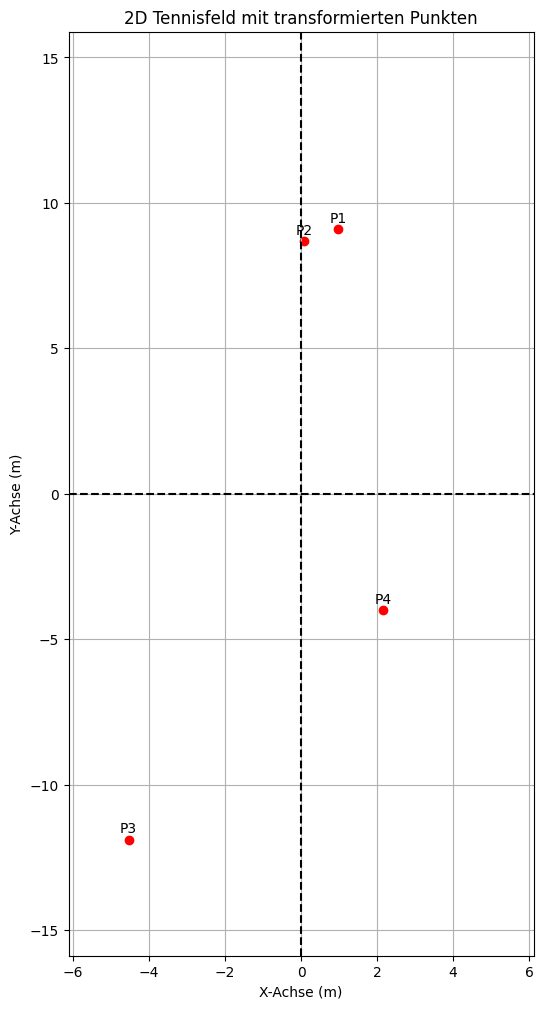

In [121]:
import numpy as np
import matplotlib.pyplot as plt
 
# Transformierte 2D-Punkte (wie berechnet)
transformed_points = np.array([
    [0.9814846 , 9.08534573],
     [0.0868918 , 8.68656675],
      [-4.5335865 , -11.89472842],
         [2.15958284, -4.01099911]  # P3 (rechts Mitte der Seitenlinie)
     
          # P1 (unten Mitte der Grundlinie)
    
                            # P3 (rechts Mitte der Seitenlinie)
])
 
# X- und Y-Koordinaten der Punkte extrahieren
x_values = transformed_points[:, 0]
y_values = transformed_points[:, 1]
 
# Erstellen des Plots
plt.figure(figsize=(6, 12))
plt.scatter(x_values, y_values, color='red')
 
# Labels der Punkte hinzufügen
for i, txt in enumerate(['P1', 'P2', 'P3', 'P4']):
    plt.annotate(txt, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,5), ha='center')
 
# Grenzen des Tennisfeldes setzen
plt.xlim(-6.115, 6.115)
plt.ylim(-15.885, 15.885)
 
# Achsenbeschriftungen und Titel
plt.xlabel('X-Achse (m)')
plt.ylabel('Y-Achse (m)')
plt.title('2D Tennisfeld mit transformierten Punkten')
 
# Linien für die Mittellinie und Seitenlinien hinzufügen (optional)
plt.axhline(0, color='black', linestyle='--')  # Mittellinie
plt.axvline(0, color='black', linestyle='--')  # Vertikale Mittellinie
 
# Netz anzeigen
plt.grid(True)
 
# Diagramm anzeigen
plt.show()

In [29]:
import pyzed.sl as sl

# Funktion zur Konvertierung
def svo_to_mp4(input_path, output_path):
    # ZED Input Type initialisieren
    input_type = sl.InputType()
    input_type.set_from_svo_file(input_path)  # Lade die SVO-Datei

    # InitParameter konfigurieren
    init_params = sl.InitParameters(input_t=input_type, svo_real_time_mode=False)
    init_params.depth_mode = sl.DEPTH_MODE.ULTRA  # Optional: Maximale Tiefengenauigkeit
    init_params.coordinate_units = sl.UNIT.METER  # Einheiten in Metern
    init_params.depth_maximum_distance = 50  # Maximale Tiefe auf 50 Meter setzen

    # ZED-Kamera erstellen
    zed = sl.Camera()

    # SVO-Datei öffnen
    status = zed.open(init_params)
    if status != sl.ERROR_CODE.SUCCESS:
        print(f"Fehler beim Öffnen der SVO-Datei: {status}")
        return

    # MP4 Aufnahmeparameter festlegen
    recording_params = sl.RecordingParameters(output_path, sl.SVO_COMPRESSION_MODE.H264)

    # Aufnahme starten
    recording_status = zed.enable_recording(recording_params)
    if recording_status != sl.ERROR_CODE.SUCCESS:
        print(f"Fehler beim Starten der Aufnahme: {recording_status}")
        zed.close()
        return

    print("Konvertierung gestartet...")
    runtime_params = sl.RuntimeParameters()
    while True:
        if zed.grab(runtime_params) == sl.ERROR_CODE.SUCCESS:
            continue  # Frames werden verarbeitet
        else:
            break

    print("Konvertierung abgeschlossen.")
    zed.disable_recording()
    zed.close()






# Eingabepfad und Ausgabepfad definieren
input_svo = "C:/Users/Sandra/Documents/ZED/Aufnahme_3_Games.svo"
output_mp4 = "C:/Users/Sandra/Documents/ZED/HD1080_SN35071549_Tennismatch_3_Games.mp4"

# Konvertierung starten
svo_to_mp4(input_svo, output_mp4)


Konvertierung gestartet...
Konvertierung abgeschlossen.


########################################################################
#
# Copyright (c) 2022, STEREOLABS.
#
# All rights reserved.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
# "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
# LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR
# A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT
# OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL,
# SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT
# LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE,
# DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY
# THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
#
########################################################################

"""
   This sample shows how to detect a human bodies and draw their 
   modelised skeleton in an OpenGL window
"""
import cv2
import sys
import pyzed.sl as sl
import ogl_viewer.viewer as gl
import cv_viewer.tracking_viewer as cv_viewer
import numpy as np
import argparse

def parse_args(init):
    if len(opt.input_svo_file)>0 and opt.input_svo_file.endswith(".svo"):
        init.set_from_svo_file(opt.input_svo_file)
        print("[Sample] Using SVO File input: {0}".format(opt.input_svo_file))
    elif len(opt.ip_address)>0 :
        ip_str = opt.ip_address
        if ip_str.replace(':','').replace('.','').isdigit() and len(ip_str.split('.'))==4 and len(ip_str.split(':'))==2:
            init.set_from_stream(ip_str.split(':')[0],int(ip_str.split(':')[1]))
            print("[Sample] Using Stream input, IP : ",ip_str)
        elif ip_str.replace(':','').replace('.','').isdigit() and len(ip_str.split('.'))==4:
            init.set_from_stream(ip_str)
            print("[Sample] Using Stream input, IP : ",ip_str)
        else :
            print("Unvalid IP format. Using live stream")
    if ("HD2K" in opt.resolution):
        init.camera_resolution = sl.RESOLUTION.HD2K
        print("[Sample] Using Camera in resolution HD2K")
    elif ("HD1200" in opt.resolution):
        init.camera_resolution = sl.RESOLUTION.HD1200
        print("[Sample] Using Camera in resolution HD1200")
    elif ("HD1080" in opt.resolution):
        init.camera_resolution = sl.RESOLUTION.HD1080
        print("[Sample] Using Camera in resolution HD1080")
    elif ("HD720" in opt.resolution):
        init.camera_resolution = sl.RESOLUTION.HD720
        print("[Sample] Using Camera in resolution HD720")
    elif ("SVGA" in opt.resolution):
        init.camera_resolution = sl.RESOLUTION.SVGA
        print("[Sample] Using Camera in resolution SVGA")
    elif ("VGA" in opt.resolution):
        init.camera_resolution = sl.RESOLUTION.VGA
        print("[Sample] Using Camera in resolution VGA")
    elif len(opt.resolution)>0: 
        print("[Sample] No valid resolution entered. Using default")
    else : 
        print("[Sample] Using default resolution")



def main():
    print("Running Body Tracking sample ... Press 'q' to quit, or 'm' to pause or restart")

    # Create a Camera object
    zed = sl.Camera()

    # Create a InitParameters object and set configuration parameters
    init_params = sl.InitParameters()
    init_params.camera_resolution = sl.RESOLUTION.HD1080  # Use HD1080 video mode
    init_params.coordinate_units = sl.UNIT.METER          # Set coordinate units
    init_params.depth_mode = sl.DEPTH_MODE.ULTRA
    init_params.coordinate_system = sl.COORDINATE_SYSTEM.RIGHT_HANDED_Y_UP
    
    parse_args(init_params)

    # Open the camera
    err = zed.open(init_params)
    if err != sl.ERROR_CODE.SUCCESS:
        exit(1)

    # Enable Positional tracking (mandatory for object detection)
    positional_tracking_parameters = sl.PositionalTrackingParameters()
    # If the camera is static, uncomment the following line to have better performances
    # positional_tracking_parameters.set_as_static = True
    zed.enable_positional_tracking(positional_tracking_parameters)
    
    body_param = sl.BodyTrackingParameters()
    body_param.enable_tracking = True                # Track people across images flow
    body_param.enable_body_fitting = False            # Smooth skeleton move
    body_param.detection_model = sl.BODY_TRACKING_MODEL.HUMAN_BODY_FAST 
    body_param.body_format = sl.BODY_FORMAT.BODY_18  # Choose the BODY_FORMAT you wish to use

    # Enable Object Detection module
    zed.enable_body_tracking(body_param)

    body_runtime_param = sl.BodyTrackingRuntimeParameters()
    body_runtime_param.detection_confidence_threshold = 40

    # Get ZED camera information
    camera_info = zed.get_camera_information()
    # 2D viewer utilities
    display_resolution = sl.Resolution(min(camera_info.camera_configuration.resolution.width, 1280), min(camera_info.camera_configuration.resolution.height, 720))
    image_scale = [display_resolution.width / camera_info.camera_configuration.resolution.width
                 , display_resolution.height / camera_info.camera_configuration.resolution.height]

    # Create OpenGL viewer
    viewer = gl.GLViewer()
    viewer.init(camera_info.camera_configuration.calibration_parameters.left_cam, body_param.enable_tracking,body_param.body_format)
    # Create ZED objects filled in the main loop
    bodies = sl.Bodies()
    image = sl.Mat()
    key_wait = 10 
    while viewer.is_available():
        # Grab an image
        if zed.grab() == sl.ERROR_CODE.SUCCESS:
            # Retrieve left image
            zed.retrieve_image(image, sl.VIEW.LEFT, sl.MEM.CPU, display_resolution)
            # Retrieve bodies
            zed.retrieve_bodies(bodies, body_runtime_param)
            # Update GL view
            viewer.update_view(image, bodies) 
            # Update OCV view
            image_left_ocv = image.get_data()
            cv_viewer.render_2D(image_left_ocv,image_scale, bodies.body_list, body_param.enable_tracking, body_param.body_format)
            cv2.imshow("ZED | 2D View", image_left_ocv)
            key = cv2.waitKey(key_wait)
            if key == 113: # for 'q' key
                print("Exiting...")
                break
            if key == 109: # for 'm' key
                if (key_wait>0):
                    print("Pause")
                    key_wait = 0 
                else : 
                    print("Restart")
                    key_wait = 10 
    viewer.exit()
    image.free(sl.MEM.CPU)
    zed.disable_body_tracking()
    zed.disable_positional_tracking()
    zed.close()
    cv2.destroyAllWindows()
    
if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--input_svo_file', type=str, help='Path to an .svo file, if you want to replay it',default = '')
    parser.add_argument('--ip_address', type=str, help='IP Adress, in format a.b.c.d:port or a.b.c.d, if you have a streaming setup', default = '')
    parser.add_argument('--resolution', type=str, help='Resolution, can be either HD2K, HD1200, HD1080, HD720, SVGA or VGA', default = '')
    opt = parser.parse_args()
    if len(opt.input_svo_file)>0 and len(opt.ip_address)>0:
        print("Specify only input_svo_file or ip_address, or none to use wired camera, not both. Exit program")
        exit()
    main() 